In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [3]:
from preprocessing import CsvRefactorer
from analytics import *

In [4]:
refac = CsvRefactorer.read_csv("041022_to_231222.csv", index_range=("2022-10-17", "2022-11-18"))
refac_pumps = CsvRefactorer.read_csv("I_pumps_200921_to_231222.csv", index_range=("2022-10-17", "2022-11-18"))

In [5]:
df_mess = refac.df
df_pumps_mess = refac_pumps.df

* 309 Р2контура
* 481 Q2контура
#### Second loop pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [6]:
time_periods = [("2022-10-17", "2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
           ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
           ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23")]

In [7]:
ids = [407, 408, 409]
arr_dfs_id = refac.select_by_ids([481, 309])
arr_dfs_id = refac_pumps.drop_if_below(arr_dfs_id, "Value", 0.4)
# filter by id and drop low currents
arr_dfs_pumps_id = refac_pumps.select_by_ids(ids)

arr_dfs_pumps_id = refac_pumps.drop_if_below(arr_dfs_pumps_id, "Value", 100)

In [8]:
arr_dfs_id, arr_dfs_pumps_id

([                          ID  Value
  Timestamp                          
  2022-10-17 14:15:53.941  481  126.0
  2022-10-17 14:15:57.991  481  144.0
  2022-10-17 14:16:00.007  481  144.0
  2022-10-17 14:16:02.042  481  144.0
  2022-10-17 14:16:55.423  481  605.0
  ...                      ...    ...
  2022-11-18 15:42:04.976  481  125.0
  2022-11-18 15:42:56.693  481  123.0
  2022-11-18 15:42:58.711  481  123.0
  2022-11-18 15:43:01.211  481  122.0
  2022-11-18 15:43:03.710  481  122.0
  
  [61510 rows x 2 columns],
                            ID  Value
  Timestamp                          
  2022-10-17 14:17:05.491  309   0.40
  2022-10-17 14:17:15.608  309   0.42
  2022-10-17 14:18:16.076  309   0.42
  2022-10-17 14:19:16.377  309   0.42
  2022-10-17 14:20:16.395  309   0.42
  ...                      ...    ...
  2022-11-18 15:39:10.707  309   0.43
  2022-11-18 15:39:26.308  309   0.42
  2022-11-18 15:39:51.475  309   0.42
  2022-11-18 15:40:01.991  309   0.43
  2022-11-18 15:40:

In [9]:
# group by 10 min
groups_pumps = refac.min_frac_groupby(10, *arr_dfs_pumps_id)
groups_wtf = refac.min_frac_groupby(10, *arr_dfs_id)

In [10]:
groups = [*groups_pumps, *groups_wtf]

In [11]:
df_10min = refac.concat_dfs(groups)

In [12]:
# df_10min = df_10min.fillna(0)

In [13]:
df_10min

,407,408,409,481,309
Timestamp,,,,,
2022-10-17 14:10:00,141.205970,147.246171,136.290670,664.000000,0.415000
2022-10-17 14:20:00,140.690685,143.550967,136.773616,873.575000,0.420000
2022-10-17 14:30:00,139.975914,143.166908,136.237449,872.225000,0.420000
2022-10-17 14:40:00,139.791483,142.854916,136.120768,870.225000,0.420000
2022-10-17 14:50:00,139.805823,142.795168,136.163785,869.725000,0.420000
...,...,...,...,...,...
2022-11-18 15:00:00,138.784568,134.504329,130.622162,712.725000,0.460000
2022-11-18 15:10:00,138.642001,134.297587,130.502354,710.650000,0.460000
2022-11-18 15:20:00,138.018719,133.874297,129.996288,710.200000,0.460000


In [14]:
# lets take periods where the same pumps where under operation
# ("2022-10-17", "2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18") - 2,3,4 pumps were operated
period1 = refac.select_time_period(
    df_10min,
    [
        ("2022-10-17", "2022-10-21"), 
        ("2022-11-08", "2022-11-11"), 
        ("2022-11-15", "2022-11-18"),
    ]
)

In [15]:
period1

{'2022-10-17 2022-10-21':                             407         408         409      481    309
 Timestamp                                                              
 2022-10-17 14:10:00  141.205970  147.246171  136.290670  664.000  0.415
 2022-10-17 14:20:00  140.690685  143.550967  136.773616  873.575  0.420
 2022-10-17 14:30:00  139.975914  143.166908  136.237449  872.225  0.420
 2022-10-17 14:40:00  139.791483  142.854916  136.120768  870.225  0.420
 2022-10-17 14:50:00  139.805823  142.795168  136.163785  869.725  0.420
 ...                         ...         ...         ...      ...    ...
 2022-10-21 23:10:00    0.000000    0.000000    0.000000    0.000  0.000
 2022-10-21 23:20:00    0.000000    0.000000    0.000000    0.000  0.000
 2022-10-21 23:30:00    0.000000    0.000000    0.000000    0.000  0.000
 2022-10-21 23:40:00    0.000000    0.000000    0.000000    0.000  0.000
 2022-10-21 23:50:00    0.000000    0.000000    0.000000    0.000  0.000
 
 [635 rows x 5 columns],

In [16]:
# analytics
from analytics import *

In [17]:
dh = DissipatedHeat(0.05)

In [18]:
period1_flted = {}
for i in period1.keys():
    period1_flted[i], _ = dh.df_md_filter(period1[i], 481)


In [19]:
averages_collection = {}

average current:  134.36666070184359
average WFR:  756.7558217982435
average Pressure:  0.4501082392708226
135.03049248224391 136.76828084466229 131.30120877862458
average current:  nan
average WFR:  nan
average Pressure:  nan
nan nan nan
average current:  140.7528866796783
average WFR:  615.275
average Pressure:  0.42090908505699826
143.959529876709 143.41828432950112 134.88084583282475


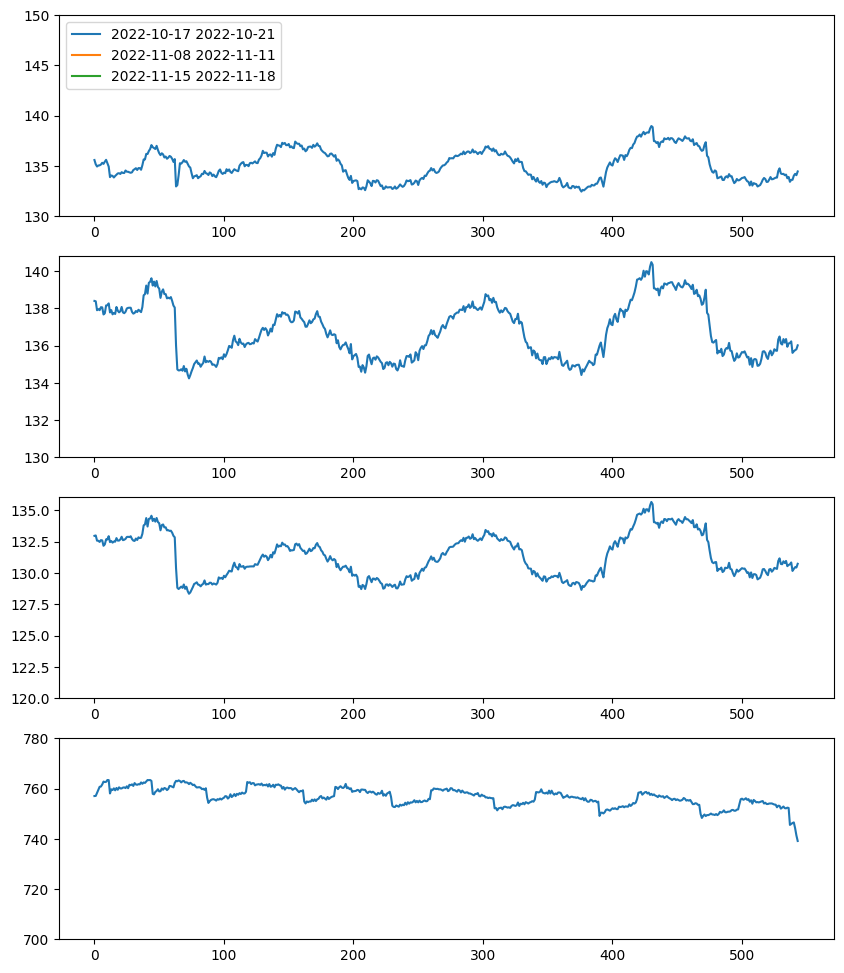

In [20]:
fig, axs = plt.subplots(4,1, figsize=(10,12))
num = list(period1_flted.keys())

step = 0
for n, k in enumerate(num):
    
    y = period1_flted[k]
    X = np.arange(step, len(y) + step)
    
    axs[0].plot(X, y[407], label=k)
    axs[0].set_ylim(130, 150)
    axs[1].plot(X, y[408])
    axs[1].set_ylim(130)
    axs[2].plot(X, y[409])
    axs[2].set_ylim(120)
    
    axs[3].plot(X, y[481])
    axs[3].set_ylim(700, 780)
    
    axs[0].legend()
    
    aver_curr = np.array(
        [
            y[407].mean(), 
            y[408].mean(), 
            y[409].mean()
        ]
    ).mean()
    
    print("average current: ", aver_curr)
    print("average WFR: ", y[481].mean())
    print("average Pressure: ", y[309].mean())

    averages_collection[k] = {
        "current": aver_curr,
        "wfr": y[481].mean(),
        "dp": y[309].mean()
    }
    
    print(
        y[407].mean(), 
        y[408].mean(), 
        y[409].mean()
    )
    
    step += len(y)

# Three first time periods were observed
## The average current on 3 operated pumps for each period is close to each other
## The slight decrease (about 5%) on WFR rate is observed
## If the pump's current does not changes let's assume that the reason of WFR decreases is because of flouring of HEs 

In [21]:
# after 2022-11-18 the pump #3 was replaced by pump #1

refac2 = CsvRefactorer.read_csv("041022_to_231222.csv", index_range=("2022-11-22", "2022-12-09"))
refac_pumps2 = CsvRefactorer.read_csv("I_pumps_200921_to_231222.csv", index_range=("2022-11-22", "2022-12-09"))

In [22]:
df_mess2 = refac.df
df_pumps_mess2 = refac_pumps.df

In [23]:
ids = [406, 407, 409] # 1, 2, 4
arr_dfs_id2 = refac2.select_by_ids([481, 309])
# filter by id and drop low currents
arr_dfs_pumps_id2 = refac_pumps2.select_by_ids(ids)
arr_dfs_pumps_id2 = refac_pumps2.drop_if_below(arr_dfs_pumps_id2, "Value", 100)

In [24]:
arr_dfs_pumps_id2

[                          ID       Value
 Timestamp                               
 2022-11-22 15:13:55.903  406  102.867783
 2022-11-22 15:14:09.520  406  106.184891
 2022-11-22 15:14:16.337  406  125.535645
 2022-11-22 15:14:36.761  406  166.974365
 2022-11-22 15:14:50.370  406  158.533356
 ...                      ...         ...
 2022-12-09 19:20:59.652  406  146.995209
 2022-12-09 19:21:10.569  406  147.388641
 2022-12-09 19:21:21.486  406  146.978424
 2022-12-09 19:21:28.036  406  147.491211
 2022-12-09 19:21:49.871  406  147.131332
 
 [56646 rows x 2 columns],
                           ID       Value
 Timestamp                               
 2022-11-22 15:15:10.883  407  101.084755
 2022-11-22 15:15:38.187  407  150.998611
 2022-11-22 15:15:58.571  407  149.987564
 2022-11-22 15:16:12.189  407  150.250168
 2022-11-22 15:16:25.819  407  149.186279
 ...                      ...         ...
 2022-12-09 19:21:54.353  407  140.694183
 2022-12-09 19:22:05.270  407  140.745575
 2022

In [25]:
# group by 10 min
groups_pumps2 = refac.min_frac_groupby(10, *arr_dfs_pumps_id2)
groups_wtf2 = refac.min_frac_groupby(10, *arr_dfs_id2)

In [26]:
groups2 = [*groups_pumps2, *groups_wtf2]
print(groups2)

[                        ID       Value
Timestamp                             
2022-11-22 15:10:00  406.0  150.484543
2022-11-22 15:20:00  406.0  149.130972
2022-11-22 15:30:00  406.0  139.907039
2022-11-22 15:40:00  406.0  139.693442
2022-11-22 15:50:00  406.0  139.575996
...                    ...         ...
2022-12-09 18:40:00  406.0  144.204650
2022-12-09 18:50:00  406.0  143.485655
2022-12-09 19:00:00  406.0  143.573066
2022-12-09 19:10:00  406.0  144.117533
2022-12-09 19:20:00  406.0  147.171257

[2474 rows x 2 columns],                         ID       Value
Timestamp                             
2022-11-22 15:10:00  407.0  145.103290
2022-11-22 15:20:00  407.0  144.239183
2022-11-22 15:30:00  407.0  143.606966
2022-11-22 15:40:00  407.0  143.375404
2022-11-22 15:50:00  407.0  143.167381
...                    ...         ...
2022-12-09 18:40:00  407.0  137.221092
2022-12-09 18:50:00  407.0  136.463063
2022-12-09 19:00:00  407.0  136.626645
2022-12-09 19:10:00  407.0  137.18786

In [27]:
df_10min2 = refac2.concat_dfs(groups2)

In [28]:
# lets take periods where the same pumps where under operation
# ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09") - 1,2,4 pumps were operated
period2 = refac.select_time_period(
    df_10min2,
    [
        ("2022-11-22", "2022-11-25"), 
        ("2022-11-29", "2022-12-02"), 
        ("2022-12-05", "2022-12-09")
        
    ]
)

In [29]:
period2_flted = {}
for i in period2.keys():
    period2_flted[i], _ = dh.df_md_filter(period2[i], 481)
period2_flted

{'2022-11-22 2022-11-25': Empty DataFrame
 Columns: [406, 407, 409, 481, 309]
 Index: [],
 '2022-11-29 2022-12-02':                             406         407         409         481    309
 Timestamp                                                                 
 2022-11-29 14:30:00  157.788102  150.251798  140.365277  486.136364  0.255,
 '2022-12-05 2022-12-09':                             406         407         409       481       309
 Timestamp                                                                  
 2022-12-09 19:20:00  147.171257  142.915231  135.967471  565.8125  0.417778}

average current:  nan
average WFR:  nan
average Pressure:  nan
average current:  149.46839218910299
average WFR:  486.1363636363636
average Pressure:  0.25499999895691855
average current:  142.0179864035712
average WFR:  565.8125
average Pressure:  0.41777777340677047


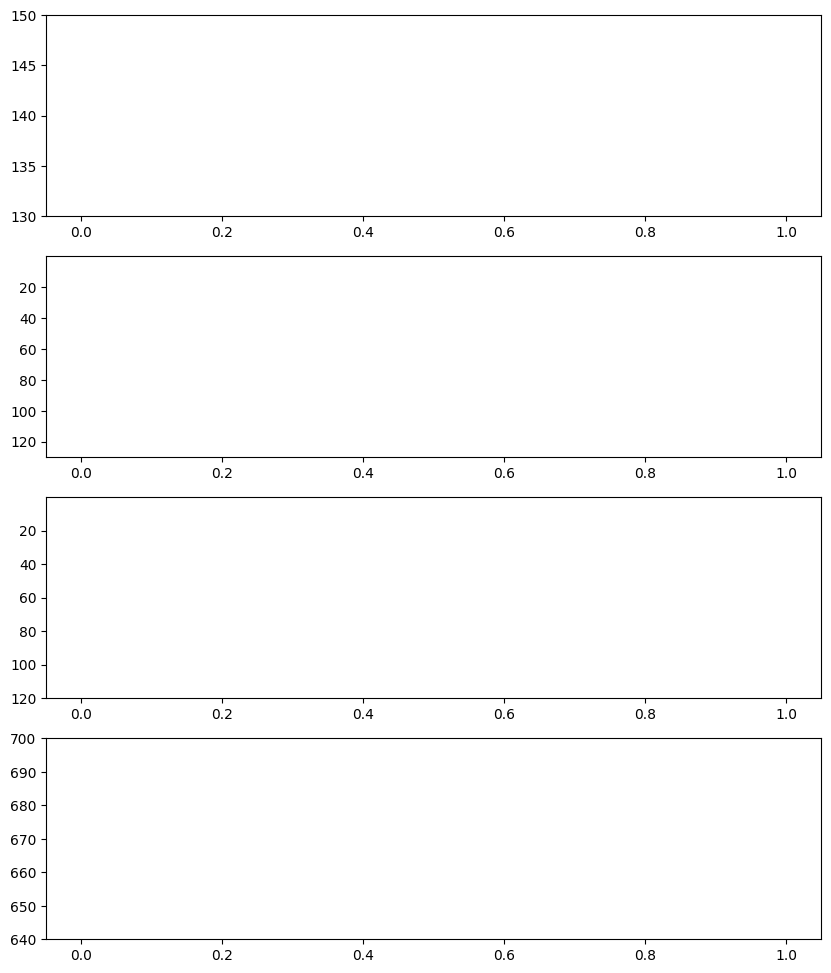

In [30]:
fig, axs = plt.subplots(4,1, figsize=(10,12))
num = list(period2_flted.keys())

step = 0
y = ""
for n, k in enumerate(num):
    
    y = period2_flted[k]
    X = np.arange(step, len(y) + step)
    
    axs[0].plot(X, y[406])
    axs[0].set_ylim(130, 150)
    axs[1].plot(X, y[407])
    axs[1].set_ylim(130)
    axs[2].plot(X, y[409])
    axs[2].set_ylim(120)
    
    axs[3].plot(X, y[481])
    axs[3].set_ylim(640, 700)
    
    
    aver_curr = np.array(
        [
            y[406].mean(), 
            y[407].mean(), 
            y[409].mean()   
        ]
    ).mean()
    
    print("average current: ", aver_curr)
    print("average WFR: ", y[481].mean())
    print("average Pressure: ", y[309].mean())

    averages_collection[k] = {
        "current": aver_curr,
        "wfr": y[481].mean(),
        "dp": y[309].mean()
    }
    
    step += len(y)

# Anylyze of second time period has shown that the average current on pumps does not changes at all BUT average WFR dropped down from 740 to 690
## But before second period started pump #3 was replacedby pump #1
## So if it's possible that pumps have different characteristics for the same current it's the reason of WTF drop


In [31]:
# lets take a look on last period 
refac3 = CsvRefactorer.read_csv("041022_to_231222.csv", index_range=("2022-12-12", "2022-12-23"))
refac_pumps3 = CsvRefactorer.read_csv("I_pumps_200921_to_231222.csv", index_range=("2022-12-12", "2022-12-23"))

In [32]:
df_mess3 = refac.df
df_pumps_mess3 = refac_pumps.df

In [33]:
ids = [406, 407, 409] # 1, 2, 4
arr_dfs_id3 = refac3.select_by_ids([481, 309])
# filter by id and drop low currents
arr_dfs_pumps_id3 = refac_pumps3.select_by_ids(ids)
arr_dfs_pumps_id3 = refac_pumps3.drop_if_below(arr_dfs_pumps_id3, "Value", 100)

In [34]:
# group by 10 min
groups_pumps3 = refac.min_frac_groupby(10, *arr_dfs_pumps_id3)
groups_wtf3 = refac.min_frac_groupby(10, *arr_dfs_id3)

In [35]:
groups3 = [*groups_pumps3, *groups_wtf3]

In [36]:
df_10min3 = refac3.concat_dfs(groups3)

In [37]:
# lets take periods where the same pumps where under operation
# ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23") - 1,2,4 pumps were under operation
period3 = refac.select_time_period(
    df_10min3,
    [
        ("2022-12-12","2022-12-16"),
        ("2022-12-19","2022-12-23"),
    ]
)

In [38]:
period3_flted = {}
for i in period3.keys():
    period3_flted[i], _ = dh.df_md_filter(period3[i], 481)
period3_flted

{'2022-12-12 2022-12-16':                             406         407         409         481       309
 Timestamp                                                                    
 2022-12-12 14:20:00  137.260166  144.976379  137.187655  616.592593  0.265000
 2022-12-16 16:30:00  149.332164  139.994711  135.715616  606.921053  0.269412,
 '2022-12-19 2022-12-23': Empty DataFrame
 Columns: [406, 407, 409, 481, 309]
 Index: []}

average current:  140.744448603778
average WFR:  611.7568226120858
average Pressure:  0.2672058821409281
average current:  nan
average WFR:  nan
average Pressure:  nan


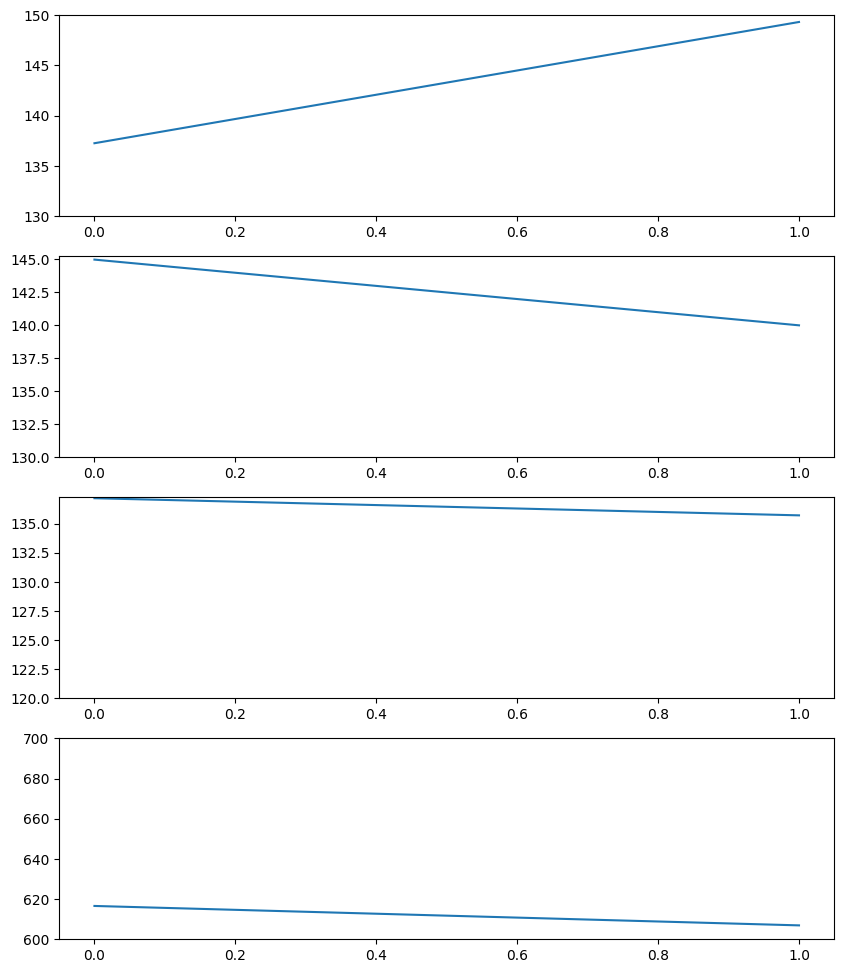

In [39]:
fig, axs = plt.subplots(4,1, figsize=(10,12))
num = list(period3_flted.keys())

step = 0
for n, k in enumerate(num):
    
    y = period3_flted[k]
    X = np.arange(step, len(y) + step)
    
    axs[0].plot(X, y[406])
    axs[0].set_ylim(130, 150)
    axs[1].plot(X, y[407])
    axs[1].set_ylim(130)
    axs[2].plot(X, y[409])
    axs[2].set_ylim(120)
    
    axs[3].plot(X, y[481])
    axs[3].set_ylim(600, 700)
    
    
    aver_curr = np.array(
        [
            y[406].mean(), 
            y[407].mean(), 
            y[409].mean()   
        ]
    ).mean()
    
    print("average current: ", aver_curr)
    print("average WFR: ", y[481].mean())
    print("average Pressure: ", y[309].mean())

    averages_collection[k] = {
        "current": aver_curr,
        "wfr": y[481].mean(),
        "dp": y[309].mean()
    }
    
    step += len(y)

# For the last period there were no observed any pumps current changes
## BUT the pressure drop reducing from cycle to cycle
## If there is a pressure drop changes so the water flow rate reduces --> flouring or just valve??

In [40]:
# PLOT delta P vs WFR

In [41]:
averages_collection = dict(sorted(averages_collection.items()))

In [42]:
X_collection = []
current_collection = []
dp_collection = []
wfr_collection = []
for k,v in averages_collection.items():
    X_collection.append(k)
    current_collection.append(v["current"])
    dp_collection.append(v["dp"]*1E3)
    wfr_collection.append(v["wfr"])

dict_keys(['2022-10-17 2022-10-21', '2022-11-08 2022-11-11', '2022-11-15 2022-11-18', '2022-11-22 2022-11-25', '2022-11-29 2022-12-02', '2022-12-05 2022-12-09', '2022-12-12 2022-12-16', '2022-12-19 2022-12-23']) 8


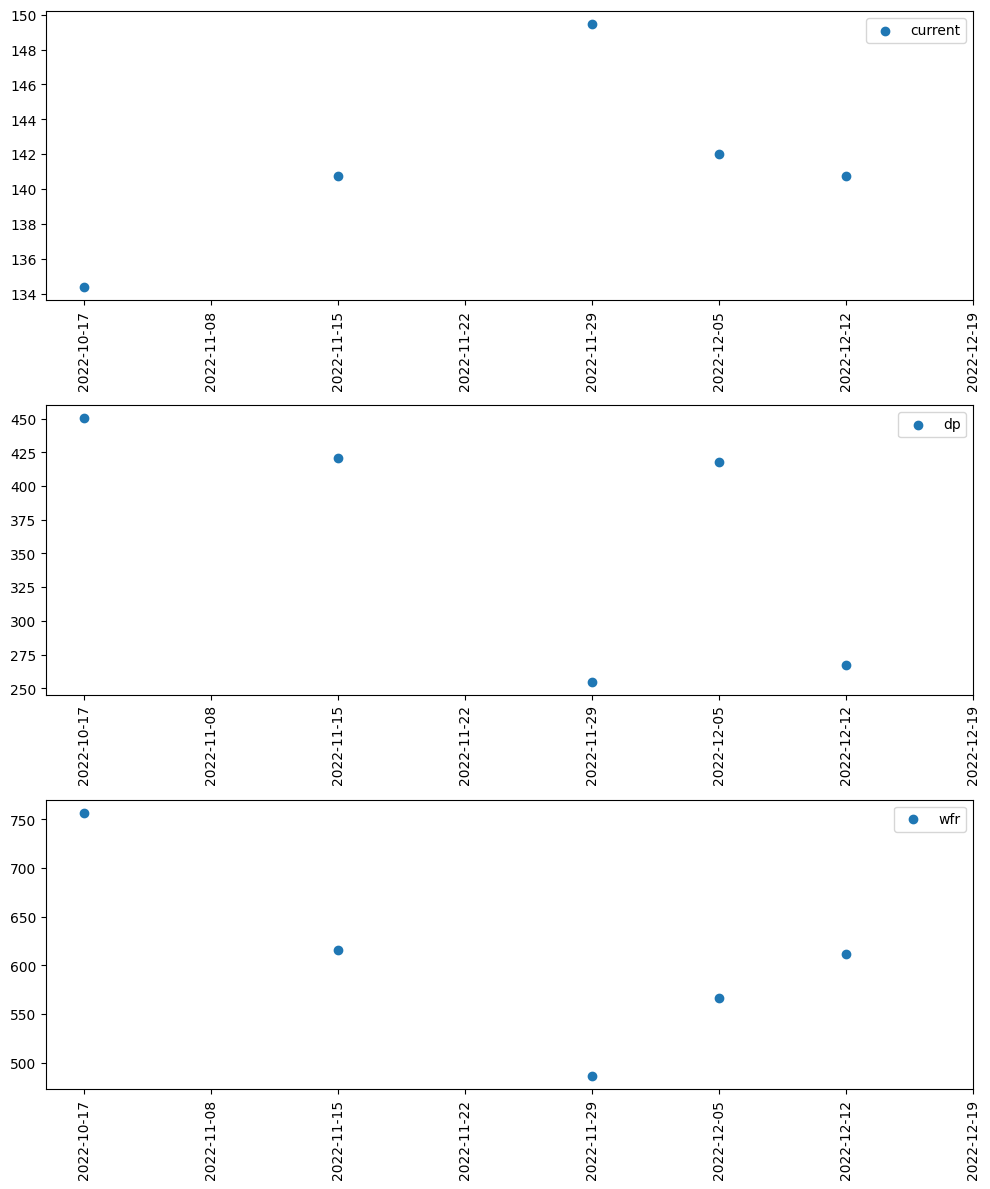

In [43]:
# average plots
st_week = [
    "2022-10-17", "2022-11-08", "2022-11-15", "2022-11-22", 
    "2022-11-29", "2022-12-05", "2022-12-12", "2022-12-19"
]

fig, axs = plt.subplots(3,1, figsize=(10,12))
print(averages_collection.keys(), len(averages_collection))

axs[0].scatter(X_collection, current_collection, label="current")
axs[1].scatter(X_collection, dp_collection, label="dp")
axs[2].scatter(X_collection, wfr_collection, label="wfr")

axs[0].set_xticks(X_collection, st_week, rotation=90)
axs[1].set_xticks(X_collection, st_week, rotation=90)
axs[2].set_xticks(X_collection, st_week, rotation=90)

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()

# Loading of extra portion of data from 01.01.2023 to 01.03.2023

In [44]:
refac_extra = CsvRefactorer.read_csv("I2_pumps_Q2_P2_090123_to_140422.csv")

In [45]:
df_extra_mess = refac_extra.df

In [46]:
df_extra_mess["ID"].unique()

array([309, 406, 407, 408, 409, 481])

In [47]:
# selection by Ids
ids_pumps_extra =  [406, 407, 408, 409]
ids_extra = [481, 309]

arr_dfs_id_extra = refac_extra.select_by_ids(ids_extra)
arr_dfs_id_pumps_extra = refac_extra.select_by_ids(ids_pumps_extra)

arr_dfs_id_pumps_extra = refac_extra.drop_if_below(arr_dfs_id_pumps_extra, "Value", 100)

In [48]:
groups_extra = refac_extra.min_frac_groupby(10, *arr_dfs_id_extra)
groups_pumps_extra = refac_extra.min_frac_groupby(10, *arr_dfs_id_pumps_extra)

In [49]:
groups_pumps_extra

[                        ID       Value
 Timestamp                             
 2023-01-11 11:20:00  406.0  143.868329
 2023-01-11 11:30:00  406.0  145.048132
 2023-01-11 11:40:00  406.0  143.563676
 2023-01-11 11:50:00  406.0  141.036099
 2023-01-11 12:00:00  406.0  140.835990
 ...                    ...         ...
 2023-04-13 23:10:00  406.0  145.591013
 2023-04-13 23:20:00  406.0  145.522945
 2023-04-13 23:30:00  406.0  145.636799
 2023-04-13 23:40:00  406.0  145.806019
 2023-04-13 23:50:00  406.0  145.677792
 
 [13324 rows x 2 columns],
                         ID       Value
 Timestamp                             
 2023-01-10 10:50:00  407.0  139.354661
 2023-01-10 11:00:00  407.0  144.516949
 2023-01-10 11:10:00  407.0  143.788628
 2023-01-10 11:20:00  407.0  143.764422
 2023-01-10 11:30:00  407.0  143.429308
 ...                    ...         ...
 2023-04-13 23:10:00  407.0  140.414952
 2023-04-13 23:20:00  407.0  140.322297
 2023-04-13 23:30:00  407.0  140.408879
 2023-04-13

In [50]:
groups_extra = [*groups_extra, *groups_pumps_extra]

In [51]:
df_10min_extra = refac_extra.concat_dfs(groups_extra)

In [52]:
df_10min_extra = df_10min_extra[df_10min_extra[481] > 200] 

In [53]:
time_periods_extra = [
    ("2023-01-10","2023-01-13"), ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"),
    ("2023-01-31","2023-02-03"), ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), 
    ("2023-02-28","2023-03-03"), ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), 
    ("2023-03-14","2023-03-17"), ("2023-03-27","2023-03-31"),
    ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14"),# ("2023-04-17","2023-04-21"), 
    #("2023-05-02","2023-05-05"), ("2023-05-08","2023-05-12"),
]
# for tp below the pump #4 was replaced by pump #1

In [54]:

period4 = refac_extra.select_time_period(df_10min_extra, time_periods_extra) 

In [55]:
period4_flted = {}
for i in period4.keys():
    period4_flted[i], _ = dh.df_md_filter(period4[i], 481)
period4_flted

{'2023-01-10 2023-01-13':                          481       309  406         407         408  \
 Timestamp                                                             
 2023-01-10 14:50:00  677.925  0.454750  0.0  138.761805  133.227608   
 2023-01-10 15:00:00  676.850  0.455294  0.0  138.630935  133.354704   
 2023-01-10 15:10:00  676.900  0.455556  0.0  138.273631  132.829826   
 2023-01-10 15:20:00  676.625  0.455769  0.0  138.240685  132.788305   
 2023-01-10 15:30:00  676.425  0.459091  0.0  137.974659  132.494212   
 ...                      ...       ...  ...         ...         ...   
 2023-01-13 15:50:00  652.300  0.450000  0.0  137.673533  130.096077   
 2023-01-13 16:00:00  651.400  0.450000  0.0  138.114330  130.289229   
 2023-01-13 16:10:00  648.900  0.450000  0.0  138.117083  130.158769   
 2023-01-13 16:20:00  646.475  0.450000  0.0  138.268544  130.155532   
 2023-01-13 16:30:00  645.200  0.450000  0.0  138.240977  129.689680   
 
                             409  
 T

average current:  133.57677396337166
average WFR:  660.5477386934673
average Pressure:  0.45105651222469056
average current:  137.05041446913404
average WFR:  681.702386634845
average Pressure:  0.46358075274203425
average current:  135.5942812976124
average WFR:  659.8473589775875
average Pressure:  0.4504428207915435
average current:  135.9939718697901
average WFR:  634.336573033708
average Pressure:  0.43999999761581415
average current:  138.03634453311392
average WFR:  691.4187710400262
average Pressure:  0.45093117293558616
average current:  137.5101651126208
average WFR:  677.23033097755
average Pressure:  0.469623390824614
average current:  135.23364155468988
average WFR:  622.3846428571429
average Pressure:  0.4452920319787178
average current:  135.24504428973
average WFR:  636.4097682119206
average Pressure:  0.45999398786285256
average current:  135.89613671053158
average WFR:  627.701014572957
average Pressure:  0.4594376067294071
average current:  136.22076296031048
average

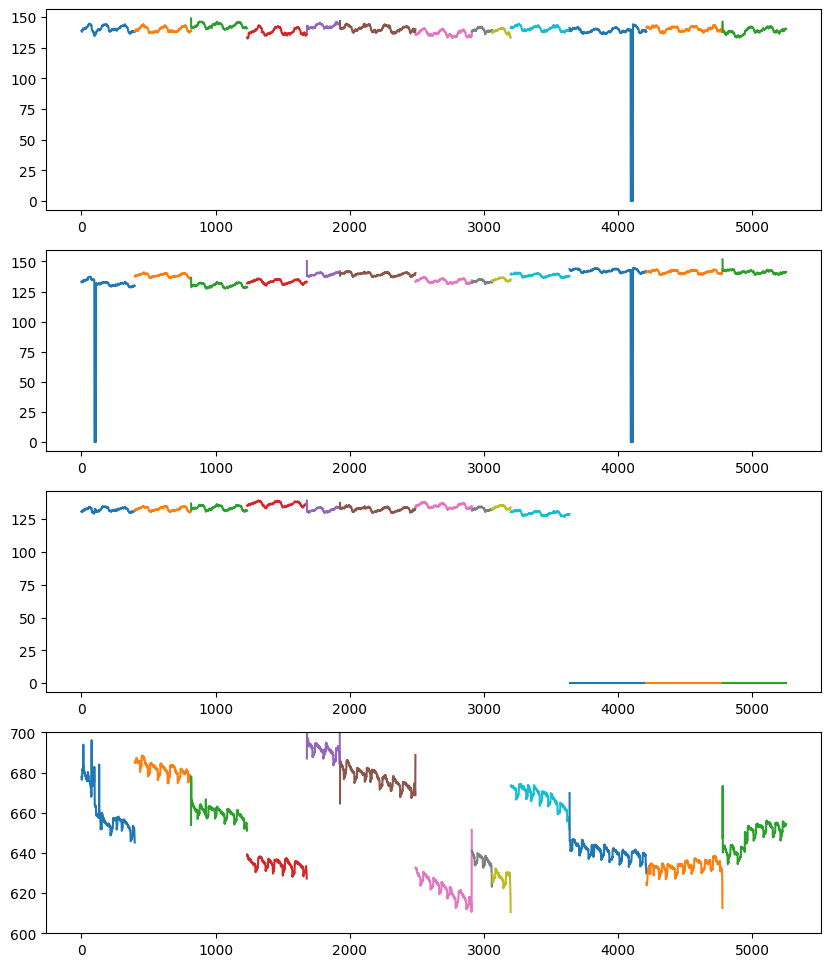

In [56]:
fig, axs = plt.subplots(4,1, figsize=(10,12))
num = list(period4_flted.keys())

step = 0
for n, k in enumerate(num):
    
    y = period4_flted[k]
    X = np.arange(step, len(y) + step)
    
    axs[0].plot(X, y[407])
#     axs[0].set_ylim(130, 150)
    axs[1].plot(X, y[408])
#     axs[1].set_ylim(130)
    if y[409].isnull().values.any():
        
        yI_rep = y[406]
    else:
#         axs[2].plot(X, y[409])
        yI_rep = y[409]
    axs[2].plot(X, yI_rep)
#     axs[2].set_ylim(120)
    
    axs[3].plot(X, y[481])
    axs[3].set_ylim(600, 700)
    
    
    aver_curr = np.array(
        [
            y[407].mean(), 
            y[408].mean(),
            yI_rep.mean()   
        ]
    ).mean()
    
    print("average current: ", aver_curr)
    print("average WFR: ", y[481].mean())
    print("average Pressure: ", y[309].mean())

    averages_collection[k] = {
        "current": aver_curr,
        "wfr": y[481].mean(),
        "dp": y[309].mean()
    }
    
    step += len(y)

In [57]:
averages_collection = dict(sorted(averages_collection.items()))

In [58]:
X_collection = []
current_collection = []
dp_collection = []
wfr_collection = []
for k,v in averages_collection.items():
    X_collection.append(k)
    current_collection.append(v["current"])
    dp_collection.append(v["dp"]*1E3)
    wfr_collection.append(v["wfr"])

dict_keys(['2022-10-17 2022-10-21', '2022-11-08 2022-11-11', '2022-11-15 2022-11-18', '2022-11-22 2022-11-25', '2022-11-29 2022-12-02', '2022-12-05 2022-12-09', '2022-12-12 2022-12-16', '2022-12-19 2022-12-23', '2023-01-10 2023-01-13', '2023-01-16 2023-01-19', '2023-01-24 2023-01-27', '2023-01-31 2023-02-03', '2023-02-07 2023-02-09', '2023-02-13 2023-02-17', '2023-02-28 2023-03-03', '2023-03-06 2023-03-07', '2023-03-09 2023-03-10', '2023-03-14 2023-03-17', '2023-03-27 2023-03-31', '2023-04-03 2023-04-07', '2023-04-10 2023-04-14']) 21


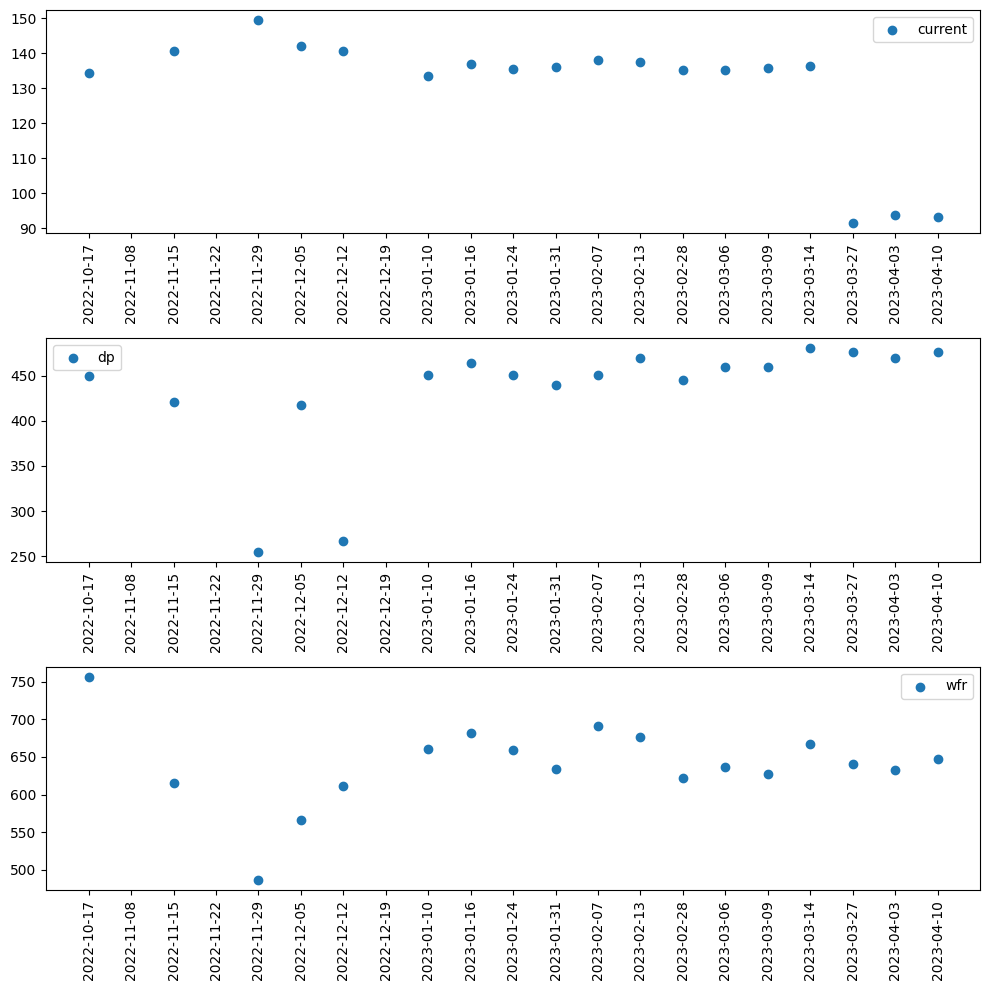

In [59]:
# average plots from 2022-10-17 to 2023-03-14
st_week = [
    "2022-10-17", "2022-11-08", "2022-11-15", "2022-11-22", 
    "2022-11-29", "2022-12-05", "2022-12-12", "2022-12-19",
    "2023-01-10", "2023-01-16", "2023-01-24", "2023-01-31",
    "2023-02-07", "2023-02-13", "2023-02-28", "2023-03-06",
    "2023-03-09", "2023-03-14", "2023-03-27",
    "2023-04-03", "2023-04-10"
    
]

fig, axs = plt.subplots(3,1, figsize=(10,10))
print(averages_collection.keys(), len(averages_collection))

axs[0].scatter(X_collection, current_collection, label="current")
axs[1].scatter(X_collection, dp_collection, label="dp")
axs[2].scatter(X_collection, wfr_collection, label="wfr")

axs[0].set_xticks(X_collection, st_week, rotation=90)
axs[1].set_xticks(X_collection, st_week, rotation=90)
axs[2].set_xticks(X_collection, st_week, rotation=90)

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()

In [64]:
# What if WFR can be specific one devided by I, A
wfr_pumps_specificI = list(map(lambda x: x/current_collection[wfr_collection.index(x)], wfr_collection))
# What if WFR can be specific one multiplied by P, kPa
wfr_pumps_specificP = list(map(lambda x: x*dp_collection[wfr_collection.index(x)], wfr_collection))

In [66]:
# normalize all wfr by normalized P (all P devided by defaul P which is accepted as 450 kPa)
norm_P = list(map(lambda x: x/450, dp_collection))
# units are the same but
wfr_pumps_specificP = list(map(lambda x: x/dp_collection[wfr_collection.index(x)], wfr_collection))

In [69]:
wfr_pumps_specificP_I = list(map(
    lambda x: x
    /(current_collection[wfr_collection.index(x)]*dp_collection[wfr_collection.index(x)]),
    wfr_collection
))

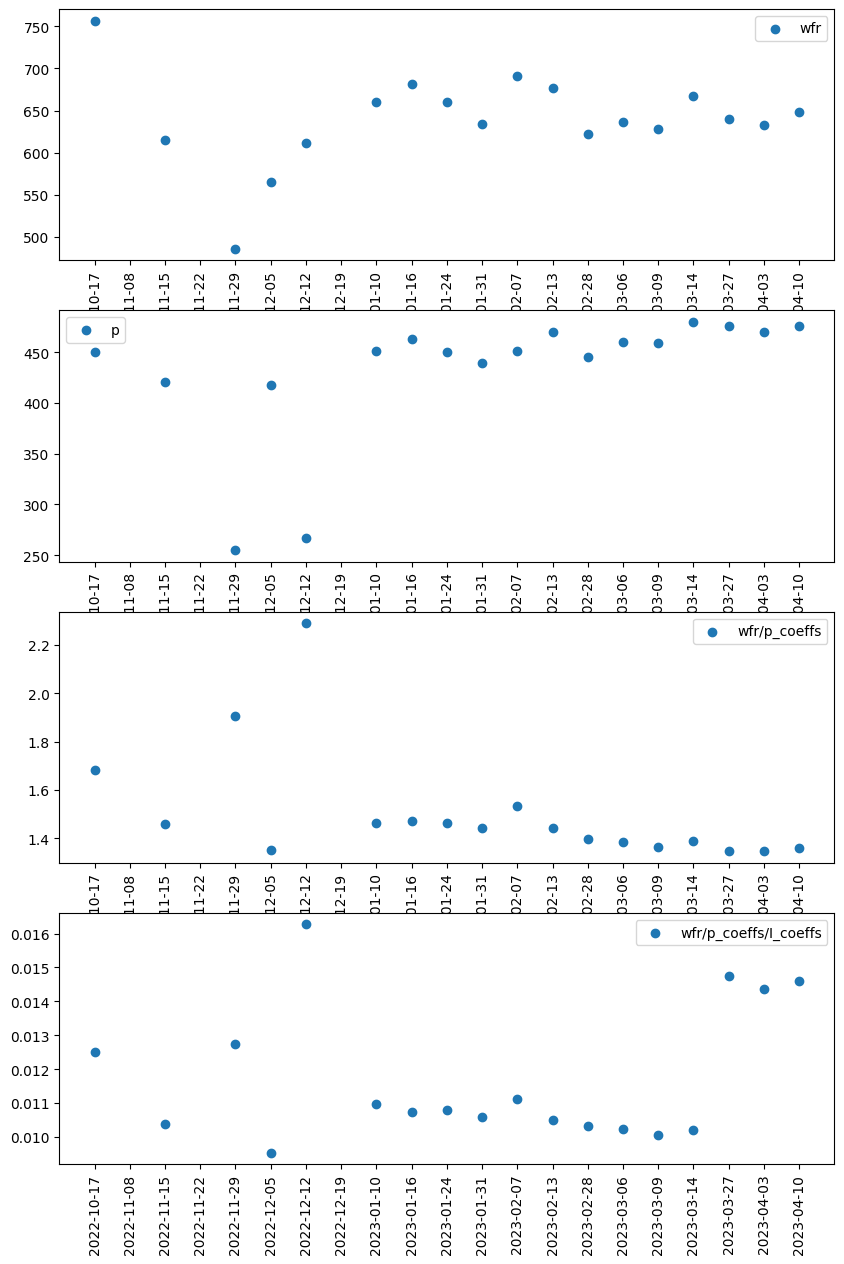

In [70]:
# average plots

fig, axs = plt.subplots(4,1, figsize=(10,15))


axs[0].scatter(X_collection, wfr_collection, label="wfr")
axs[1].scatter(X_collection, dp_collection, label="p")
axs[2].scatter(X_collection, wfr_pumps_specificP, label="wfr/p_coeffs")
axs[3].scatter(X_collection, wfr_pumps_specificP_I, label="wfr/p_coeffs/I_coeffs")

axs[0].set_xticks(X_collection, st_week, rotation=90)
axs[1].set_xticks(X_collection, st_week, rotation=90)
axs[2].set_xticks(X_collection, st_week, rotation=90)
axs[3].set_xticks(X_collection, st_week, rotation=90)

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

In [64]:
# if the data for 2022-10-17 asstiates with a condition when all HE are clean 
# and can be taken as origins

In [65]:
# scale X_collection by Energy produced during a week
# X_collectiong
def get_hours_onpower(df, time_period):
    st, fn = time_period
    weektd = (df.loc[st: fn].index[-1] 
    - df.loc[st: fn].index[0])
    return weektd.days*24+ weektd.seconds/3600

In [66]:
df_10min_for_ind = pd.concat([df_10min, df_10min2, df_10min3], axis=0)


In [67]:
hours_on_power = []
hours_on_power_extra = []

In [68]:
for i in range(len(time_periods)):
    if i > 0:
        hours_on_power.append(get_hours_onpower(df_10min_for_ind, time_periods[i]) + hours_on_power[i-1])
    else:
        hours_on_power.append(get_hours_onpower(df_10min_for_ind, time_periods[i]))

In [69]:
for i in range(len(time_periods_extra)):
    if i > 0:
        hours_on_power_extra.append(get_hours_onpower(df_10min_extra, time_periods_extra[i]) + hours_on_power_extra[i-1])
    else:
        hours_on_power_extra.append(get_hours_onpower(df_10min_extra, time_periods_extra[i]) + hours_on_power[-1])

In [70]:
hours_on_power = [*hours_on_power, *hours_on_power_extra]

Text(0.5, 0, 'Time onpower, hour')

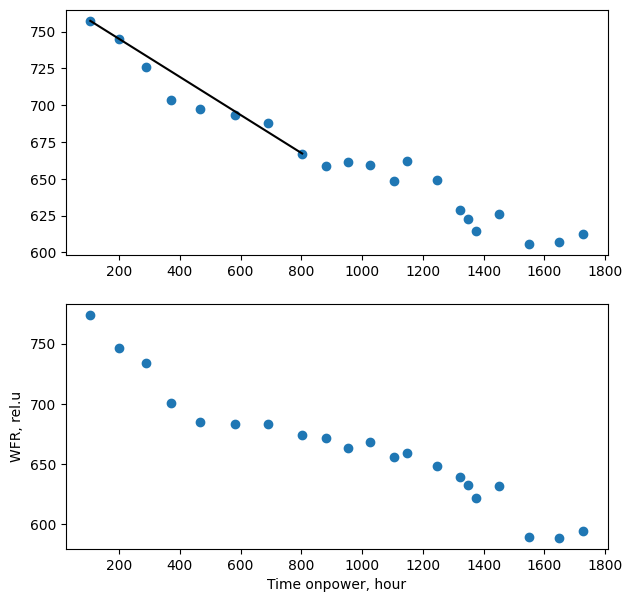

In [71]:
fig, axs = plt.subplots(2,1, figsize=(7,7))
axs[0].scatter(hours_on_power, wfr_pumps_specificP, label="wfr/p_coeffs")
axs[0].plot(
    # at 0 and 7 points the same pumps were under operation
    [hours_on_power[0], hours_on_power[7]],
    [wfr_pumps_specificP[0], wfr_pumps_specificP[7]],
    color="black"
)
axs[1].scatter(hours_on_power, wfr_pumps_specificP_I, label="wfr/p_coeffs/I_coeffs")
plt.ylabel("WFR, rel.u")
plt.xlabel("Time onpower, hour")

In [72]:
# try to fit curve to exp law

from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.optimize import curve_fit

In [73]:
def exp_att(X, m, b):
    return m * np.exp(-b*X)

In [74]:
n = Normalizer()
wfr_pumps_specificP = np.array(wfr_pumps_specificP)
# # wfrP_tr = n.fit(np.array(wfr_pumps_specificP).reshape(-1, 1))
# wfrP_tr = n.fit(wfr_pumps_specificP.reshape(-1,1))
# wfrP_norm = wfrP_tr.transform(wfr_pumps_specificP.reshape(-1,1))
# wfr_pumps_specificP

wfrP_norm = wfr_pumps_specificP/wfr_pumps_specificP.sum()
hop_norm = np.array(hours_on_power)/np.array(hours_on_power).max()

In [75]:
wfrP_norm

array([0.0543475 , 0.05346323, 0.05210169, 0.0505081 , 0.05005123,
       0.04977126, 0.0493572 , 0.04787585, 0.04728886, 0.04748484,
       0.04730308, 0.04655353, 0.04750812, 0.04656636, 0.04513355,
       0.04467559, 0.0441176 , 0.04492183, 0.04348113, 0.04353862,
       0.04395082])

In [76]:
popt, pcov = curve_fit(exp_att, hop_norm, wfrP_norm)

In [77]:
wfr_pred = exp_att(hop_norm, *popt)
wfr_pred.sum()

0.9999891693297112

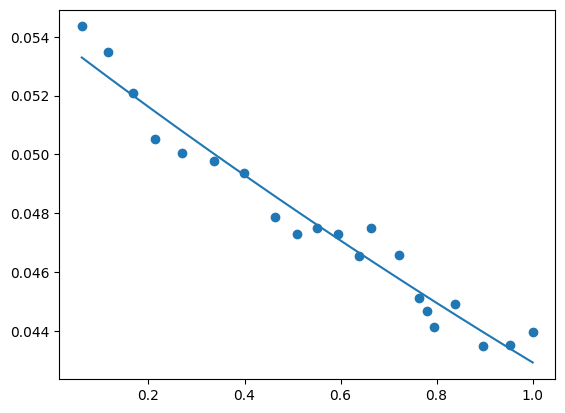

In [78]:
plt.plot(hop_norm, wfr_pred)
plt.scatter(hop_norm, wfrP_norm)

In [79]:
# so appr coefs are array([0.06234713, 0.19895694])

## FOUND APPRX FUNCTION
## but it's for data where sin like behavior exists 
## What if the better way to take max wrf from each peak to get wfr mean value?
#### The idea implementaion is below

In [80]:
from scipy.signal import find_peaks

In [81]:
all_time_periods = [*time_periods, time_periods_extra]

In [82]:
all_periods_ftrd = {**period1_flted, **period2_flted, **period3_flted, **period4_flted}
all_periods_ftrd

{'2022-10-17 2022-10-21':                             407         408         409      481       309
 Timestamp                                                                 
 2022-10-17 15:10:00  135.588344  138.406593  132.954765  757.050  0.450000
 2022-10-17 15:20:00  135.162965  138.385626  132.983206  757.100  0.450000
 2022-10-17 15:30:00  134.940895  137.906603  132.567317  758.300  0.450000
 2022-10-17 15:40:00  135.042448  137.966080  132.561021  759.425  0.450000
 2022-10-17 15:50:00  135.059267  137.908498  132.466111  760.725  0.450000
 ...                         ...         ...         ...      ...       ...
 2022-10-21 18:40:00  133.617408  135.612325  130.153920  746.300  0.450000
 2022-10-21 18:50:00  134.027931  135.696268  130.314886  746.550  0.450000
 2022-10-21 19:00:00  134.209926  135.758626  130.449938  744.250  0.451538
 2022-10-21 19:10:00  134.079966  135.803223  130.426749  741.350  0.452941
 2022-10-21 19:20:00  134.451201  136.016991  130.723324  739.1

In [83]:
all_peaks = {}

for i in all_periods_ftrd.keys():
    all_peaks[i], _ = find_peaks(
        all_periods_ftrd[i][481], 
#         height=all_periods_ftrd[i][481].mean(),
        distance=30
)

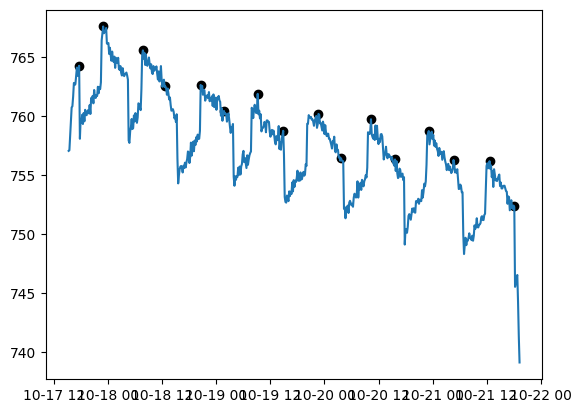

In [84]:
# quick view

plt.plot(period1_flted["2022-10-17 2022-10-21"][481])
plt.scatter(
    period1_flted["2022-10-17 2022-10-21"].index[all_peaks["2022-10-17 2022-10-21"]],
    period1_flted["2022-10-17 2022-10-21"][481][all_peaks["2022-10-17 2022-10-21"]],
    color="black"
)


In [85]:
# old/new mean
period1_flted["2022-10-17 2022-10-21"][481].mean(),\
period1_flted["2022-10-17 2022-10-21"][481][all_peaks["2022-10-17 2022-10-21"]].mean()


(757.531872585282, 759.9875)

757.531872585282 759.9875
746.3028169014085 749.48
729.5622921615202 730.7227272727273
688.4877685799155 691.2409090909091
682.6851498742692 686.4649999999999
689.9285971542705 693.9216666666666
678.6721483451537 680.521875
622.6512668549201 624.9300000000001
660.5477386934673 667.3886363636364
681.702386634845 683.4270833333334
659.8473589775875 662.8083333333333
634.336573033708 636.0395833333333
691.4187710400262 695.3392857142857
677.23033097755 679.3683333333333
622.3846428571429 624.2625
636.4097682119206 638.56875
627.701014572957 628.6125
667.8542237442923 669.0961538461538
640.4574845311757 642.278125
633.1676400759734 635.623076923077
647.946140481509 652.3384615384615


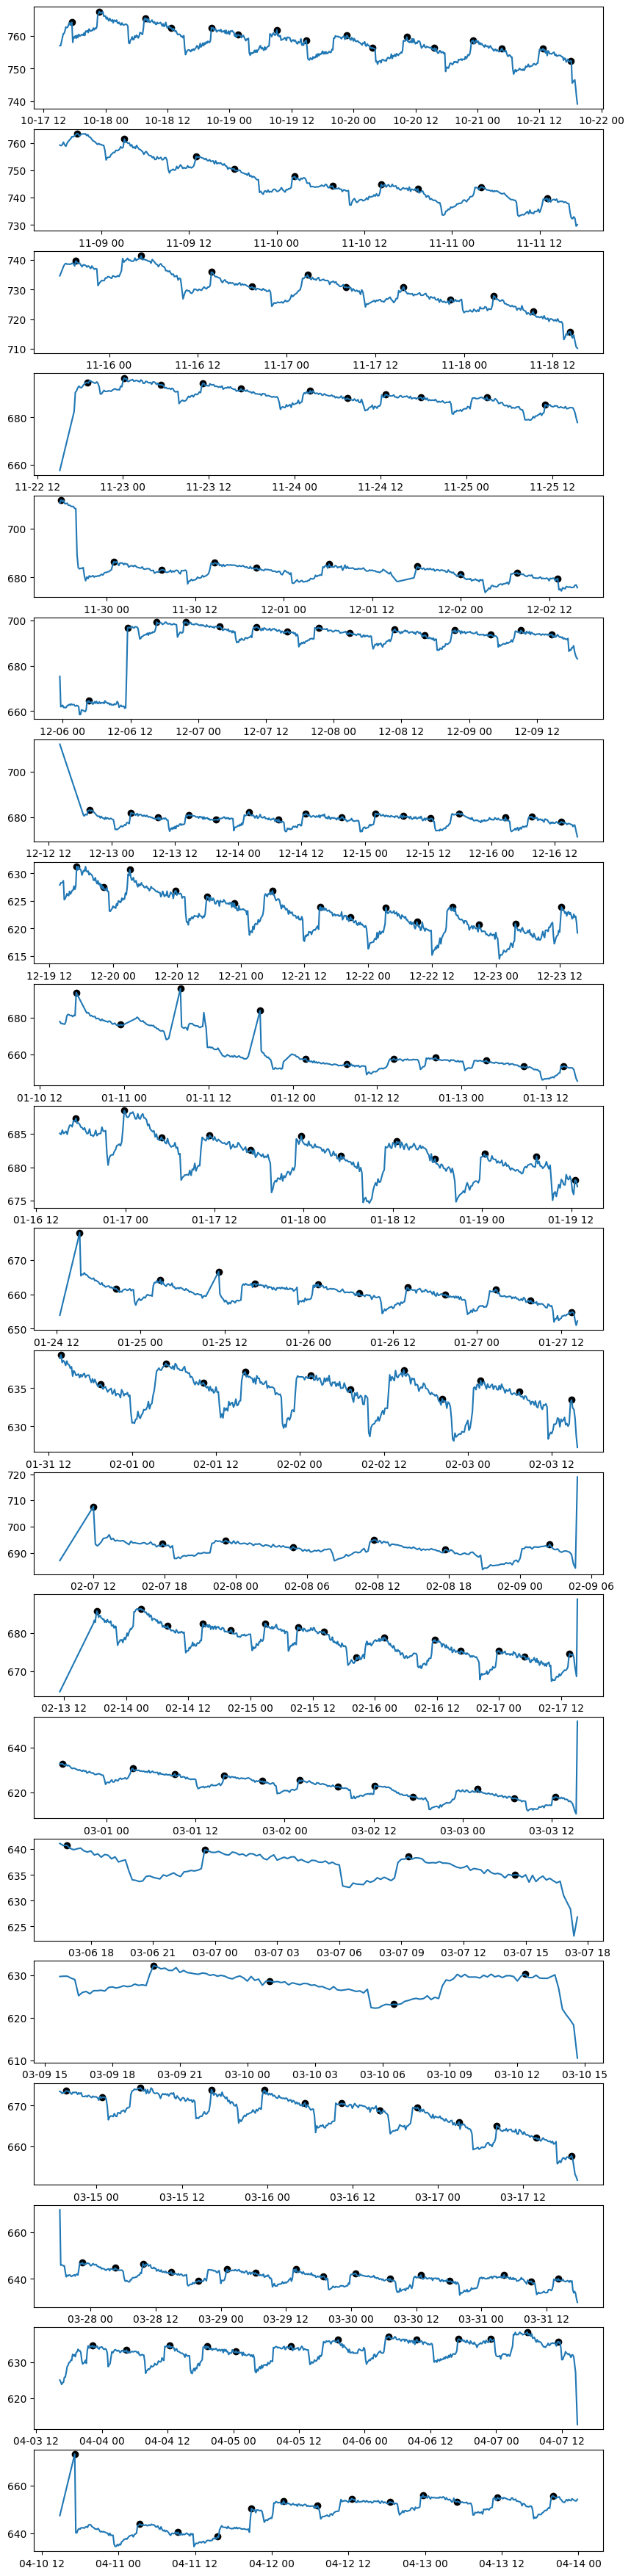

In [86]:
# edit wfr_collection - adds new(updated) means of wfr
wfr_collection_upd = []

fig, axs = plt.subplots(len(all_periods_ftrd.keys()), 1, figsize=(10, 45))
for i in range(len(all_periods_ftrd.keys())):
    k = list(all_periods_ftrd.keys())[i]
    X = all_periods_ftrd[k].index
    y = all_periods_ftrd[k][481]
    axs[i].plot(X, y)
    axs[i].scatter(X[all_peaks[k]], y[all_peaks[k]], color="black")
     
    wfr_collection_upd.append(y[all_peaks[k]].mean())
    
    print(y.mean(), y[all_peaks[k]].mean())

In [114]:
# does the same as above except 1 thing - now P is not default but mean value
# normalize all wfr by normalized P

norm_P = list(map(lambda x: x/450, dp_collection))
# units are the same but
# devision by coeffs of P (units are m3/h)
# wfr_pumps_specificP_upd = list(map(lambda x: x/norm_P[wfr_collection_upd.index(x)], wfr_collection_upd))

# devision by value of P (units are m3/h/kPa)
wfr_pumps_specificP_upd = list(map(lambda x: x/dp_collection[wfr_collection_upd.index(x)], wfr_collection_upd))

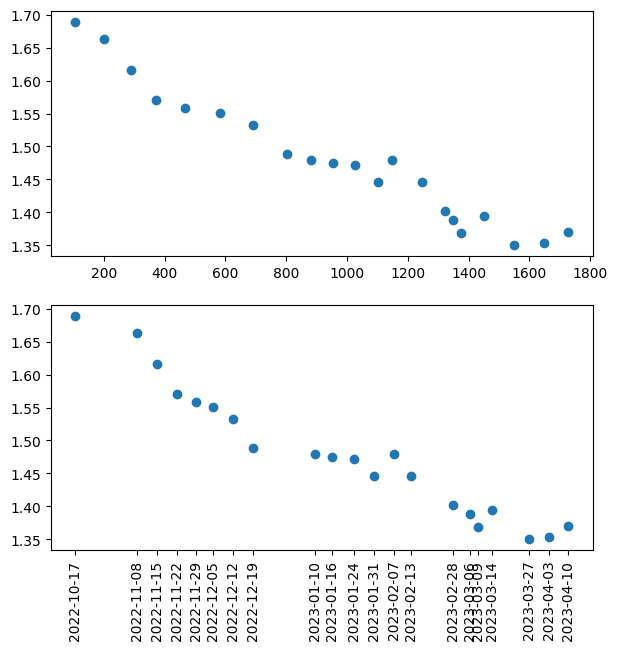

In [115]:
fig, axs = plt.subplots(2,1, figsize=(7,7))
axs[0].scatter(hours_on_power, wfr_pumps_specificP_upd, label="wfr/p_coeffs")
# axs[0].scatter(hours_on_power, wfr_pumps_specificP, label="wfr/p_coeffs")

axs[1].scatter(pd.to_datetime(st_week), wfr_pumps_specificP_upd, label="wfr/p_coeffs")
axs[1].set_xticks(st_week, st_week, rotation=90)


In [116]:
# normalize wtf_pumps_specificP_upd by I
# devision by value of P (units are m3/h/kPa/A)
wfr_pumps_specificP_I_upd = list(map(lambda x: x/current_collection[wfr_pumps_specificP_upd.index(x)], wfr_pumps_specificP_upd))

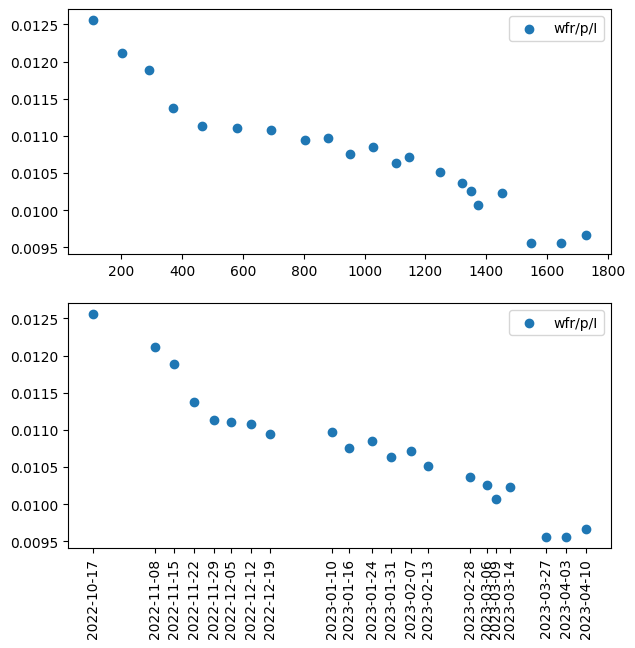

In [117]:
fig, axs = plt.subplots(2,1, figsize=(7,7))
axs[0].scatter(hours_on_power, wfr_pumps_specificP_I_upd, label="wfr/p/I")

axs[1].scatter(pd.to_datetime(st_week), wfr_pumps_specificP_I_upd, label="wfr/p/I")
axs[1].set_xticks(st_week, st_week, rotation=90)
axs[0].legend()
axs[1].legend()

In [111]:
# Try to estimate losses due to pumps replacing 
period1_wfrP_I_s = wfr_pumps_specificP_I_upd[1]
period1_wfrP_I_f = wfr_pumps_specificP_I_upd[2]
period2_wfrP_I_s = wfr_pumps_specificP_I_upd[3]
period2_wfrP_I_f = wfr_pumps_specificP_I_upd[7]
period3_wfrP_I_s = wfr_pumps_specificP_I_upd[8]
period3_wfrP_I_f = wfr_pumps_specificP_I_upd[17]
period4_wfrP_I_s = wfr_pumps_specificP_I_upd[18]

p1_to_p2 = period1_wfrP_I_f/period2_wfrP_I_s*0.99
p3_tp_p4 = period3_wfrP_I_f/period4_wfrP_I_s*0.98 # skipped 1 whole week so coeff is 0.98
week_chill_losses = 1 - wfr_pumps_specificP_I_upd[1]/wfr_pumps_specificP_I_upd[0]
period2_wfrP_I =  np.array(wfr_pumps_specificP_I_upd[3:8])*p1_to_p2
period4_wfrP_I =  np.array(wfr_pumps_specificP_I_upd[18:])*p3_tp_p4
print(p1_to_p2, p3_tp_p4)

wfr_pumps_specificP_I_upd[0]/wfr_pumps_specificP_I_upd[1], period2_wfrP_I[-1]/wfr_pumps_specificP_I_upd[8]

1.034386862897845 1.0488531233788088


(1.0358530963638541, 1.0319145007945003)

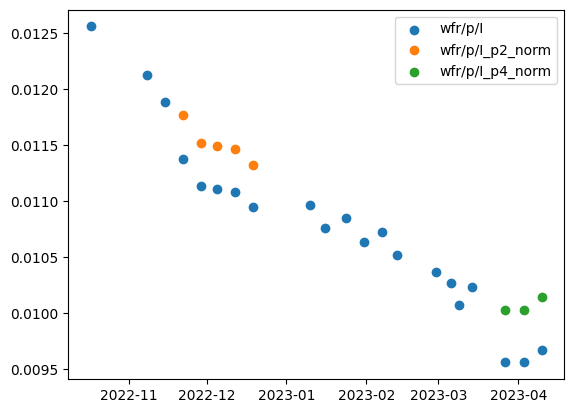

In [113]:
# fig, axs = plt.subplots(2,1, figsize=(7,7))

plt.scatter(pd.to_datetime(st_week), wfr_pumps_specificP_I_upd, label="wfr/p/I")
plt.scatter(pd.to_datetime(st_week[3:8]), period2_wfrP_I, label="wfr/p/I_p2_norm")
plt.scatter(pd.to_datetime(st_week[18:]), period4_wfrP_I, label="wfr/p/I_p4_norm")
# axs[1].set_xticks(st_week, st_week, rotation=90)
plt.legend()


# The Q losses caused by pumps replacement is about 4-5%
# The Q losses due to @reactor chill time@ - fouling when reactor shutted down is about 3-4%

# lets now add data from 14-04-2023 - to 17-05-2023
# important note! Since 02-05-2023 all 5 HE are under operation

In [93]:
refac_extra2 = CsvRefactorer.read_csv("140423_170523_2nd_circuit.csv")

In [94]:
df_extra_mess2 = refac_extra2.df

In [95]:
df_extra_mess2["ID"].unique()

array([309, 406, 407, 408, 409, 481])

In [96]:
time_periods_extra2 = [
    ("2023-04-17","2023-04-21"), ("2023-05-02","2023-05-05"), 
    ("2023-05-08","2023-05-12"), ("2023-05-15","2023-05-17")
]

In [97]:
# selection by Ids
ids_pumps_extra2 =  [406, 407, 408]
ids_extra2 = [481, 309]

arr_dfs_id_extra2 = refac_extra2.select_by_ids(ids_extra2)
arr_dfs_id_pumps_extra2 = refac_extra2.select_by_ids(ids_pumps_extra2)

arr_dfs_id_pumps_extra2 = refac_extra2.drop_if_below(arr_dfs_id_pumps_extra2, "Value", 100)

In [98]:
groups_extra2 = refac_extra2.min_frac_groupby(10, *arr_dfs_id_extra2)
groups_pumps_extra2 = refac_extra2.min_frac_groupby(10, *arr_dfs_id_pumps_extra2)

In [99]:
groups_extra2 = [*groups_extra2, *groups_pumps_extra2]

In [100]:
df_10min_extra2 = refac_extra2.concat_dfs(groups_extra2)
df_10min_extra2["2023-04-17"]

/tmp/ipykernel_3491/773770657.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_10min_extra2["2023-04-17"]


,481,309,406,407,408
Timestamp,,,,,
2023-04-17 00:00:00,NaN,NaN,NaN,NaN,NaN
2023-04-17 00:10:00,NaN,NaN,NaN,NaN,NaN
2023-04-17 00:20:00,NaN,NaN,NaN,NaN,NaN
2023-04-17 00:30:00,NaN,NaN,NaN,NaN,NaN
2023-04-17 00:40:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-04-17 23:10:00,652.100,0.479,144.096908,141.478833,143.458219
2023-04-17 23:20:00,652.175,0.477,144.239636,141.593425,143.262510
2023-04-17 23:30:00,651.950,0.477,144.913577,142.388494,143.639948


In [101]:
period5 = refac_extra2.select_time_period(
    df_10min_extra2,
    time_periods_extra2
)

In [102]:
period5_flted = {}

for i in period5.keys():
    period5_flted[i], _ = dh.df_md_filter(period5[i], 481)

average current:  142.54235853092396
average WFR:  654.8494122965642
average Pressure:  0.4735708212011761
average current:  142.61030996222226
average WFR:  718.5918512117081
average Pressure:  0.3628768285115562
average current:  143.64553873235522
average WFR:  754.3853327495622
average Pressure:  0.39569107718956853
average current:  144.50661975963874
average WFR:  763.479293592437
average Pressure:  0.3997204325089025


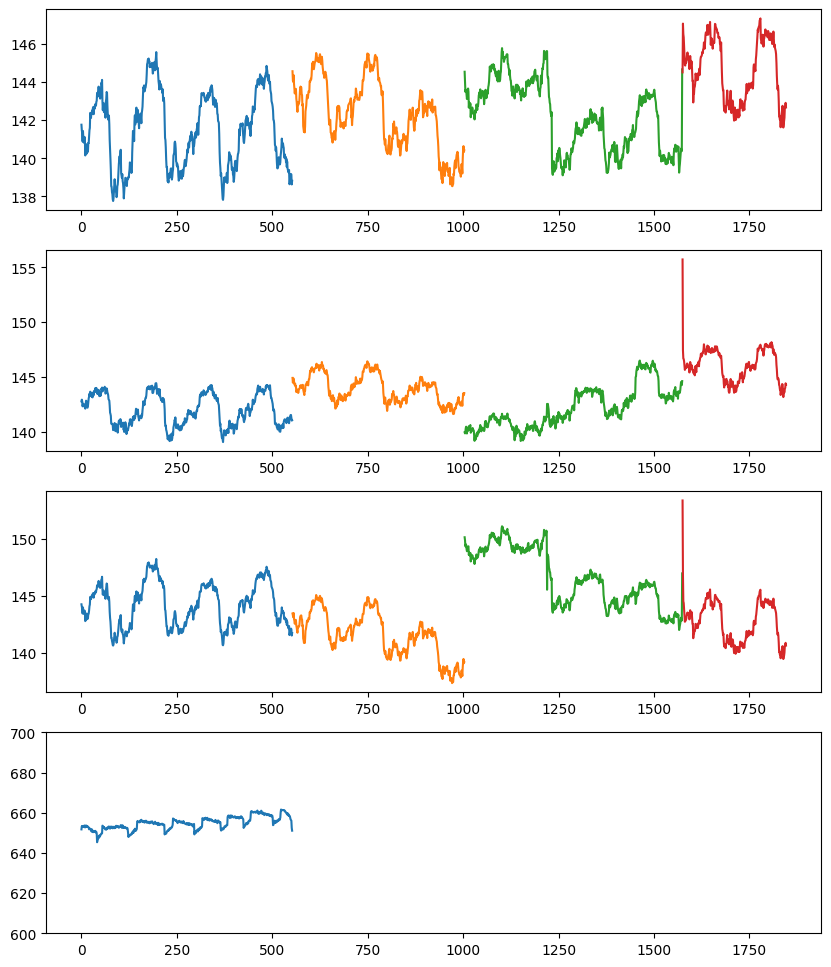

In [103]:
fig, axs = plt.subplots(4,1, figsize=(10,12))
num = list(period5_flted.keys())

step = 0
for n, k in enumerate(num):
    
    y = period5_flted[k]
    X = np.arange(step, len(y) + step)
    
    axs[0].plot(X, y[407])
#     axs[0].set_ylim(130, 150)
    axs[1].plot(X, y[408])
#     axs[1].set_ylim(130)

    yI_rep = y[406]
    axs[2].plot(X, yI_rep)
#     axs[2].set_ylim(120)
    
    axs[3].plot(X, y[481])
    axs[3].set_ylim(600, 700)
    
    
    aver_curr = np.array(
        [
            y[407].mean(), 
            y[408].mean(),
            yI_rep.mean()   
        ]
    ).mean()
    
    print("average current: ", aver_curr)
    print("average WFR: ", y[481].mean())
    print("average Pressure: ", y[309].mean())

    averages_collection[k] = {
        "current": aver_curr,
        "wfr": y[481].mean(),
        "dp": y[309].mean()
    }
    
    step += len(y)